In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import Reinforcement Learning data
rl = pd.read_csv('log-250-training.txt', sep=" ", header=None)
rl = rl.iloc[:, [7, 9, 12, 14]]
rl.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import greedy data
greedy = pd.read_csv('log-greedy-best-first-search.txt', sep=" ", header=None)
greedy = greedy.iloc[:, [7, 9, 12, 14]]
greedy.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import random data
random = pd.read_csv('log-random-walk.txt', sep=" ", header=None)
random = random.iloc[:, [7, 9, 12, 14]]
random.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import a start
a_star = pd.read_csv('log-random-walk.txt', sep=" ", header=None)
a_star = a_star.iloc[:, [7, 9, 12, 14]]
a_star.columns = ['episode_number', 'score', 'time_step', 'global_time']

In [3]:
# clean data 
rl = rl.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
greedy = greedy.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
random = random.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
a_star = a_star.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))

In [4]:
rl['category'] = 'rl'
greedy['category'] = 'greedy'
random['category'] = 'random'
a_star['category'] = 'a_star'

In [9]:
# data = rl.append(greedy, ignore_index=True)
# data = data.append(random, ignore_index=True)
# data = data.append(a_str, ignore_index=True)

data = rl.append([greedy, random, a_star], ignore_index=True)
print(len(data))

11690


In [7]:
print(data.head())

   episode_number  score  time_step  global_time category
0               0     -8          5            5       rl
1               1   -208          5           10       rl
2               2     -8          5           15       rl
3               3   -105          3           18       rl
4               4   -105          3           21       rl


In [8]:
data.dtypes

episode_number     int64
score              int64
time_step          int64
global_time        int64
category          object
dtype: object

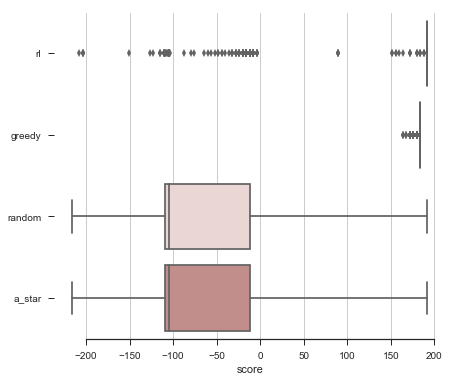

In [21]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")

# # Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="score", y="category", data=data,
            whis=np.inf, palette="vlag")

# # Add in points to show each observation
# sns.swarmplot(x="score", y="category", data=data,
#               size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

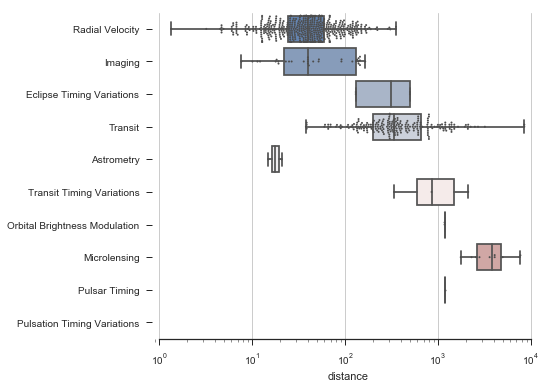

In [14]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=np.inf, palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [22]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
print(df.head())

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


In [ ]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="score", y="global_time", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

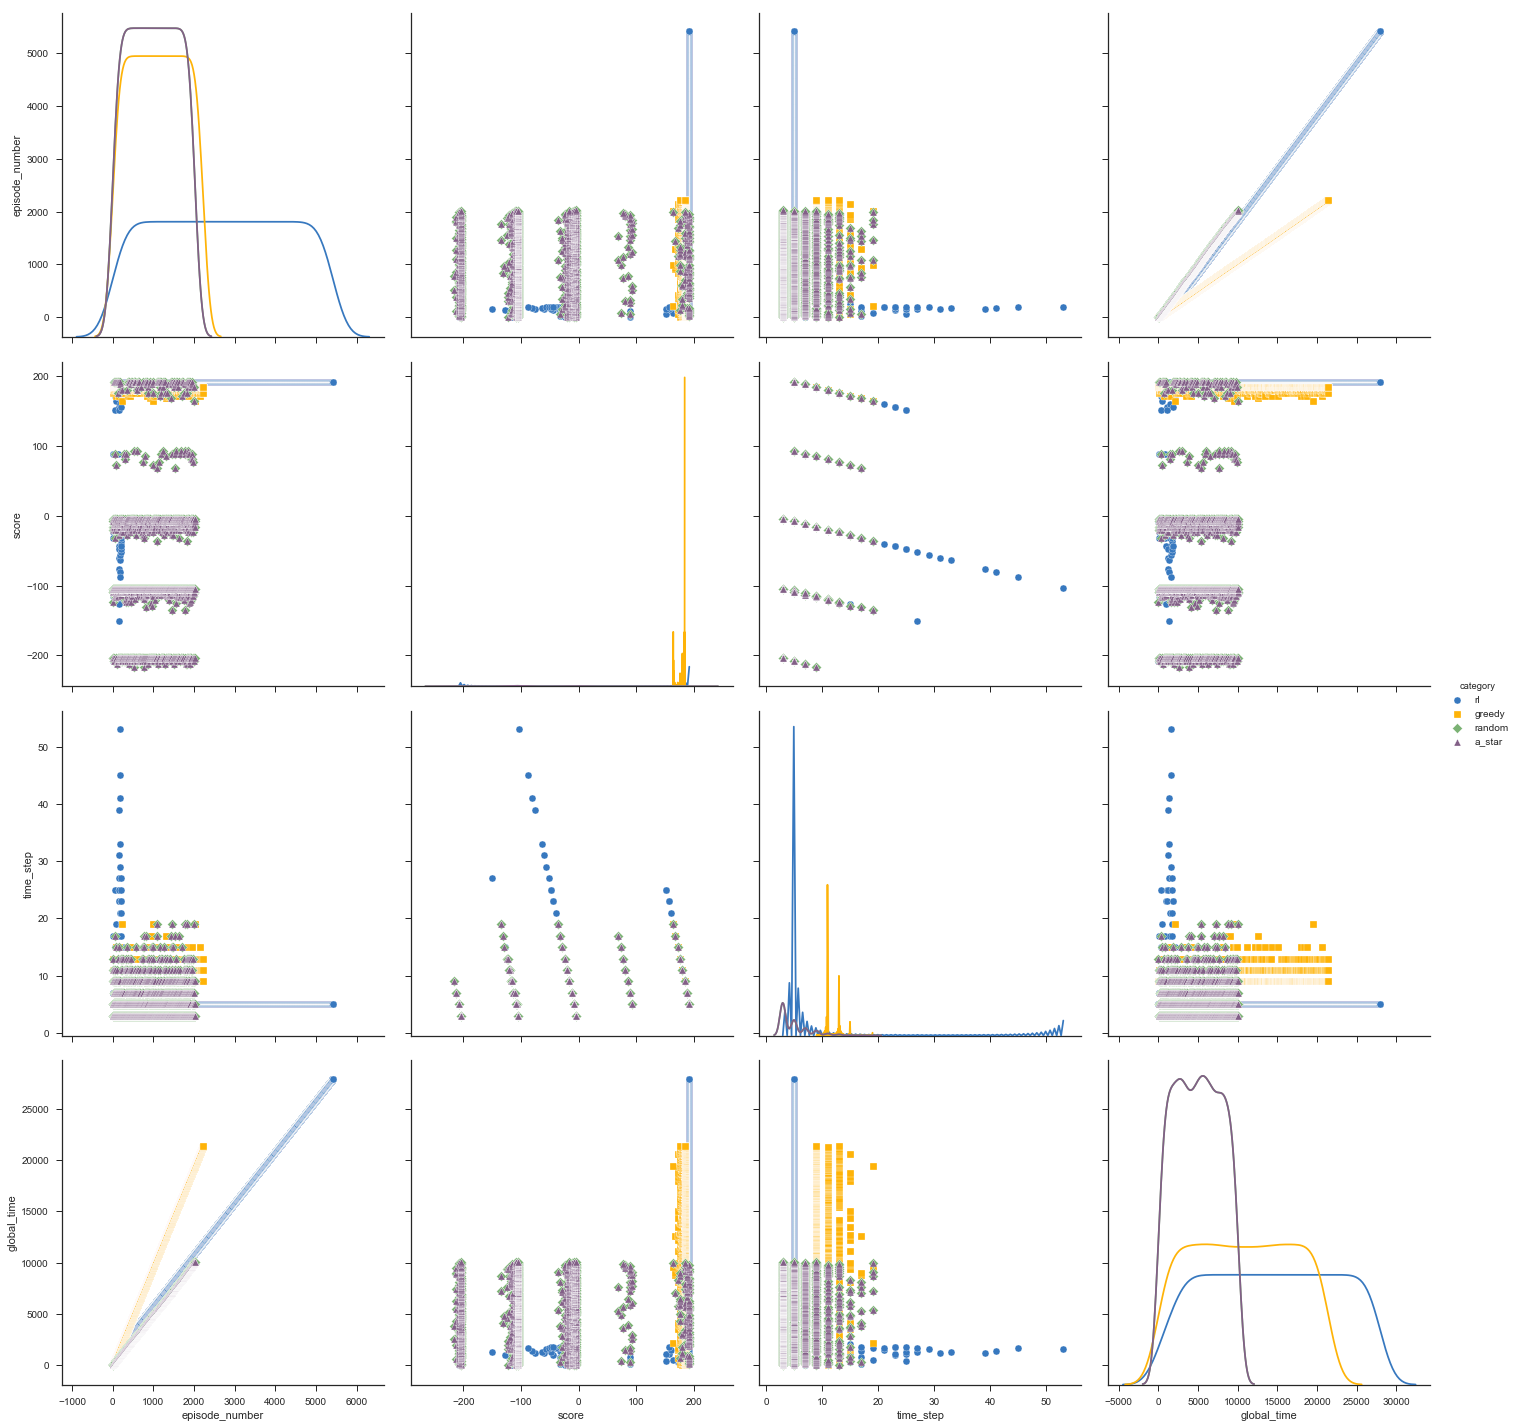

In [31]:
colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.pairplot(data, hue="category", palette=sns.xkcd_palette(colors), markers=["o", "s", "D", '^'], diag_kind="kde", size=5)

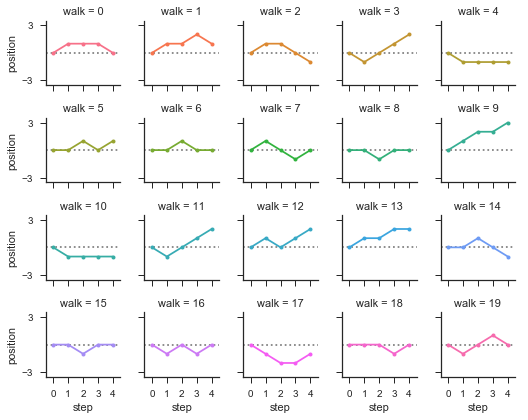

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

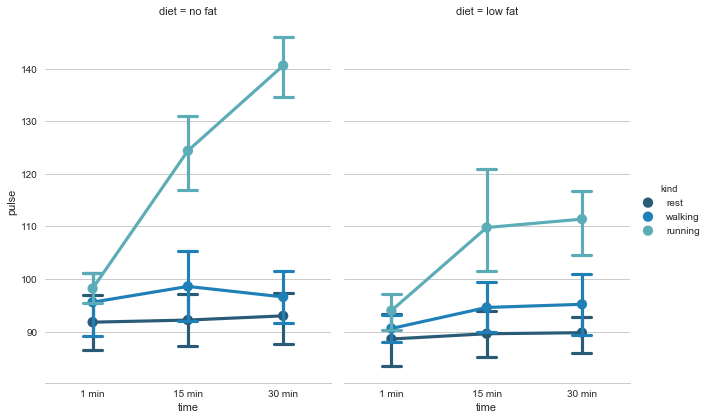

In [33]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=df,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

In [34]:
print(df.head())

   Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest


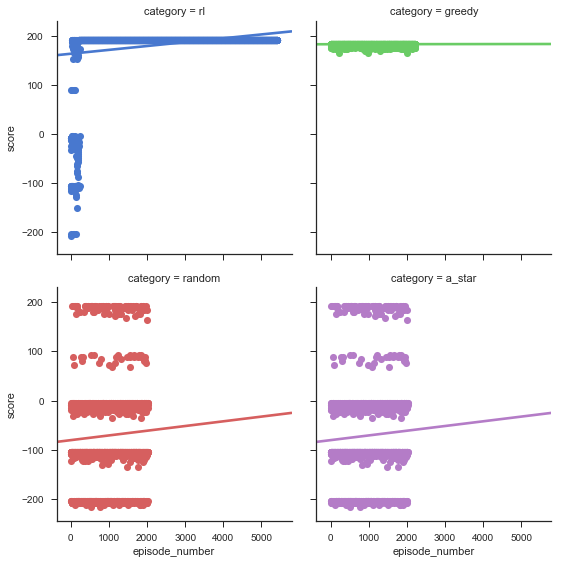

In [38]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="episode_number", y="score", col="category", hue="category", data=data,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})